In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

D:\Development_Avecto\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [ ]:
https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

using the PACF plot. We should expect our AR process to show gradual decrease in the ACF plot since being an AR process its present has good correlation with the past lags. We expect PACF to have sharp fall after near lags as these lags near to present can capture the variation so well that we don’t need past lags to predict present.

In [2]:

t = np.linspace(0, 10, 500)
#normal distributed values
ys = np.random.normal(0,5,500)

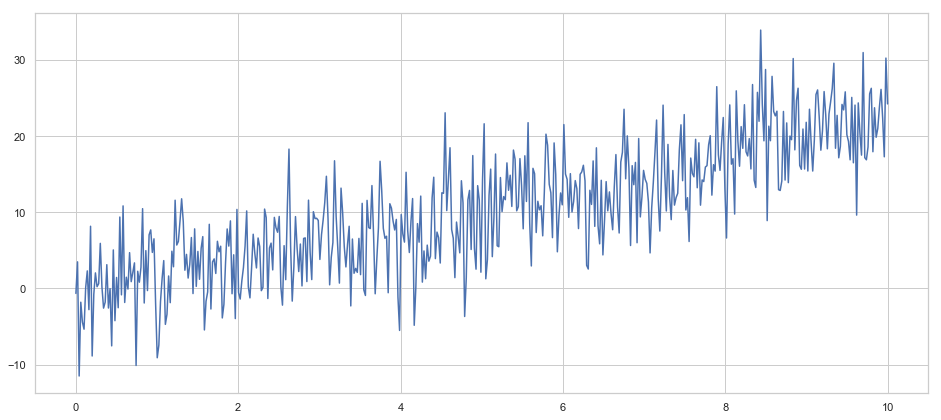

In [5]:
#exponential series to get the trend
ye = np.exp(t**0.5)
#adding normally distributed series in exponential series
y = ys+ye
#plot
plt.figure(figsize=(16,7))
plt.plot(t,y)

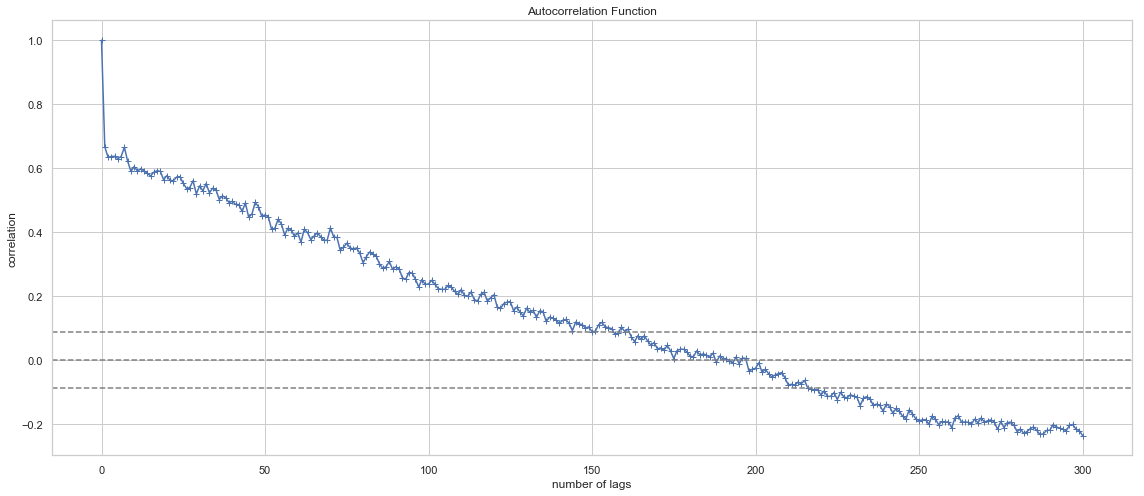

In [6]:
#calling auto correlation function
lag_acf = acf(y, nlags=300)
#Plot ACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In the above correlation plot dotted lines represent the confidence band, with center dotted line represents mean and upper and lower dotted line represent boundries based on 95% confidence interval.
Notice that we have good positive correlation with the lags upto 150, this is the point where ACF plot cuts the upper confidence threshold. Although we have good correlation upto 150th lag we cannot use all of them as it will create multi-collinearity problem, thats why we turn to PACF plot to get only the most relevant lags!

In [9]:
lag_acf[0:151]

array([1.        , 0.66687862, 0.63423148, 0.63633903, 0.63734088,
       0.63016107, 0.63624287, 0.66550184, 0.62161889, 0.58989134,
       0.60521407, 0.59082713, 0.59788742, 0.59176605, 0.58420107,
       0.5758987 , 0.58745466, 0.59213361, 0.58998971, 0.56399082,
       0.5770349 , 0.56198556, 0.56083131, 0.57263856, 0.573531  ,
       0.55271715, 0.53649681, 0.53950208, 0.56077692, 0.51956421,
       0.5447818 , 0.52918724, 0.55205933, 0.52302835, 0.53731955,
       0.5327782 , 0.50212365, 0.51330743, 0.5074533 , 0.49220986,
       0.49652331, 0.4868802 , 0.48600767, 0.46474219, 0.49161895,
       0.446927  , 0.45662275, 0.49291907, 0.47990917, 0.45002438,
       0.45383673, 0.44809993, 0.40965934, 0.41180157, 0.44004466,
       0.4258669 , 0.39197633, 0.41212088, 0.40808446, 0.38683805,
       0.39753271, 0.36922965, 0.40867233, 0.39916404, 0.37688203,
       0.38806749, 0.39807307, 0.38587667, 0.37525378, 0.37438564,
       0.41371305, 0.38518462, 0.3835061 , 0.34398599, 0.35337

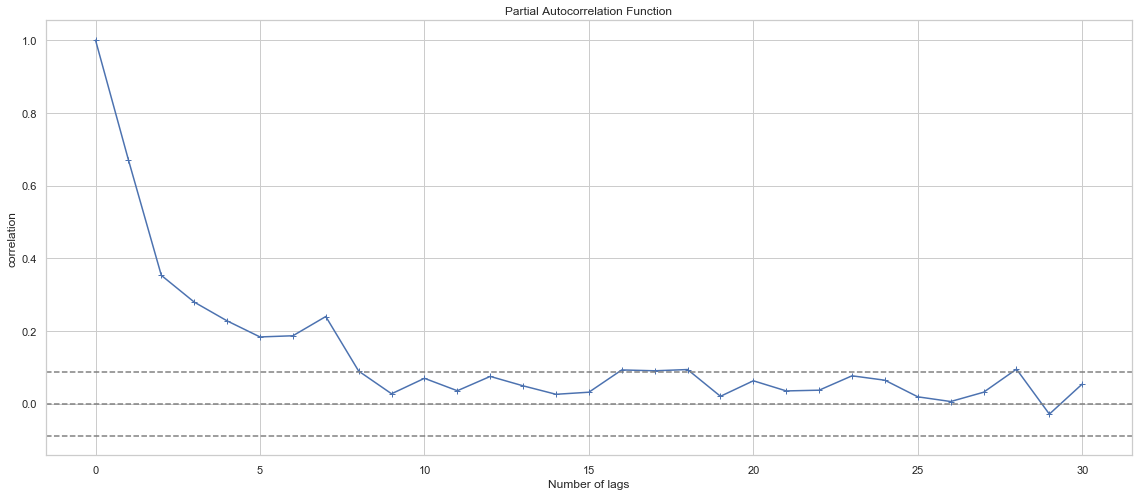

In [10]:
#calling partial correlation function
lag_pacf = pacf(y, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()


In the above plot we can see that lags upto 7 have good correlation before the plot first cuts the upper confidence interval. This is our p value i.e the order of our AR process. We can model given AR process using linear combination of first 7 lags.

While building a machine learning model we should avoid multicollinear features. The same applies to time series models as well.
We find optimum features or order of the AR process using the PACF plot, as it removes variations explained by earlier lags so we get only the relevant features.

# MA  Model

In [ ]:
Moving Avarage is calucated to remove the seasonal effect 
-And allows to see any trend in the data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [3]:

#xma = np.random.randint(1,50000,100)
xma = np.random.normal(0,25,1000)

In [4]:

#lets create a MA series having mean 2 and of order 2
y5 = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)

In [18]:
s1=pd.Series(xma)
s2=pd.Series(y5)
df=pd.concat([s1,s2],axis=1)


In [19]:
df.head()

,0,1
0,-34.865700,-35.027991
1,-3.608051,-3.017872
2,1.206916,-31.353603
3,-3.958923,-49.868735
4,-52.322301,-82.740262
